In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import collections
from numpy import mean
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('steam_reviews.csv')

In [3]:
data

date_posted  funny  helpful  hour_played  is_early_access_review  \
0       2019-02-10      2        4          578                   False   
1       2019-02-10      0        0          184                   False   
2       2019-02-07      0        0          892                   False   
3       2018-06-14    126     1086          676                   False   
4       2017-06-20     85     2139          612                   False   
...            ...    ...      ...          ...                     ...   
434886  2018-11-17      1       37           10                   False   
434887  2018-11-17      3       41           38                   False   
434888  2018-11-20      0        0           36                   False   
434889  2018-11-18      1       44           12                   False   
434890  2019-01-21      1       28           20                   False   

       recommendation                                             review  \
0         Recommended  &gt Played as German Reich&gt Declare war on B...   
1         Recommended                                               yes.   
2         Recommended  Very good game although a bit overpriced in my...   
3         Recommended  Out of all the reviews I wrote This one is pro...   
4         Recommended  Disclaimer I survivor main. I play games for f...   
...               ...                                                ...   
434886    Recommended  YOUR FLESH WILL ROT AND DECAY.STEEL IS IMMORTA...   
434887    Recommended  Domini and Dominae I believe what we are deali...   
434888    Recommended  First off if you like X Com style of games you...   
434889    Recommended  As a disclaimer I'm an AdMech player on the ta...   
434890    Recommended  Don't listen to people who claim it's the game...   

                                              title  
0       Expansion - Hearts of Iron IV: Man the Guns  
1       Expansion - Hearts of Iron IV: Man the Guns  
2       Expansion - Hearts of Iron IV: Man the Guns  
3                                  Dead by Daylight  
4                                  Dead by Daylight  
...                                             ...  
434886                 Warhammer 40,000: Mechanicus  
434887                 Warhammer 40,000: Mechanicus  
434888                 Warhammer 40,000: Mechanicus  
434889                 Warhammer 40,000: Mechanicus  
434890                 Warhammer 40,000: Mechanicus  

[434891 rows x 8 columns]

In [4]:
data['date_posted'] = pd.to_datetime(data['date_posted'])
data['date_posted'] = (data['date_posted'] - data['date_posted'].min())  / np.timedelta64(1,'D')

In [5]:
data['recommendation'] = data['recommendation'].replace(['Recommended','Not Recommended'],[True, False])

In [6]:
data

date_posted  funny  helpful  hour_played  is_early_access_review  \
0            2974.0      2        4          578                   False   
1            2974.0      0        0          184                   False   
2            2971.0      0        0          892                   False   
3            2733.0    126     1086          676                   False   
4            2374.0     85     2139          612                   False   
...             ...    ...      ...          ...                     ...   
434886       2889.0      1       37           10                   False   
434887       2889.0      3       41           38                   False   
434888       2892.0      0        0           36                   False   
434889       2890.0      1       44           12                   False   
434890       2954.0      1       28           20                   False   

        recommendation                                             review  \
0                 True  &gt Played as German Reich&gt Declare war on B...   
1                 True                                               yes.   
2                 True  Very good game although a bit overpriced in my...   
3                 True  Out of all the reviews I wrote This one is pro...   
4                 True  Disclaimer I survivor main. I play games for f...   
...                ...                                                ...   
434886            True  YOUR FLESH WILL ROT AND DECAY.STEEL IS IMMORTA...   
434887            True  Domini and Dominae I believe what we are deali...   
434888            True  First off if you like X Com style of games you...   
434889            True  As a disclaimer I'm an AdMech player on the ta...   
434890            True  Don't listen to people who claim it's the game...   

                                              title  
0       Expansion - Hearts of Iron IV: Man the Guns  
1       Expansion - Hearts of Iron IV: Man the Guns  
2       Expansion - Hearts of Iron IV: Man the Guns  
3                                  Dead by Daylight  
4                                  Dead by Daylight  
...                                             ...  
434886                 Warhammer 40,000: Mechanicus  
434887                 Warhammer 40,000: Mechanicus  
434888                 Warhammer 40,000: Mechanicus  
434889                 Warhammer 40,000: Mechanicus  
434890                 Warhammer 40,000: Mechanicus  

[434891 rows x 8 columns]

In [7]:
fun_vote = data[['funny', 'title']]

In [8]:
fun_vote

funny                                        title
0           2  Expansion - Hearts of Iron IV: Man the Guns
1           0  Expansion - Hearts of Iron IV: Man the Guns
2           0  Expansion - Hearts of Iron IV: Man the Guns
3         126                             Dead by Daylight
4          85                             Dead by Daylight
...       ...                                          ...
434886      1                 Warhammer 40,000: Mechanicus
434887      3                 Warhammer 40,000: Mechanicus
434888      0                 Warhammer 40,000: Mechanicus
434889      1                 Warhammer 40,000: Mechanicus
434890      1                 Warhammer 40,000: Mechanicus

[434891 rows x 2 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'Expansion - Hearts of Iron IV: Man the Guns'),
  Text(1, 0, 'Dead by Daylight'),
  Text(2, 0, 'Wargroove'),
  Text(3, 0, 'Wallpaper Engine'),
  Text(4, 0, 'Factorio'),
  Text(5, 0, 'Insurgency: Sandstorm'),
  Text(6, 0, 'Cold Waters'),
  Text(7, 0, 'Tannenberg'),
  Text(8, 0, 'Pathfinder: Kingmaker'),
  Text(9, 0, 'MONSTER HUNTER: WORLD'),
  Text(10, 0, 'Divinity: Original Sin 2 - Definitive Edition'),
  Text(11, 0, 'Football Manager 2019'),
  Text(12, 0, "Garry's Mod"),
  Text(13, 0, 'Survivor Pass: Vikendi'),
  Text(14, 0, 'Moonlighter'),
  Text(15, 0, 'Terraria'),
  Text(16, 0, 'GOD EATER 3'),
  Text(17, 0, 'Sid Meier’s Civilization® VI'),
  Text(18, 0, 'Rocket League®'),
  Text(19, 0, 'Subnautica: Below Zero'),
  Text(20, 0, "Tom Clancy's Rainbow Six® Si

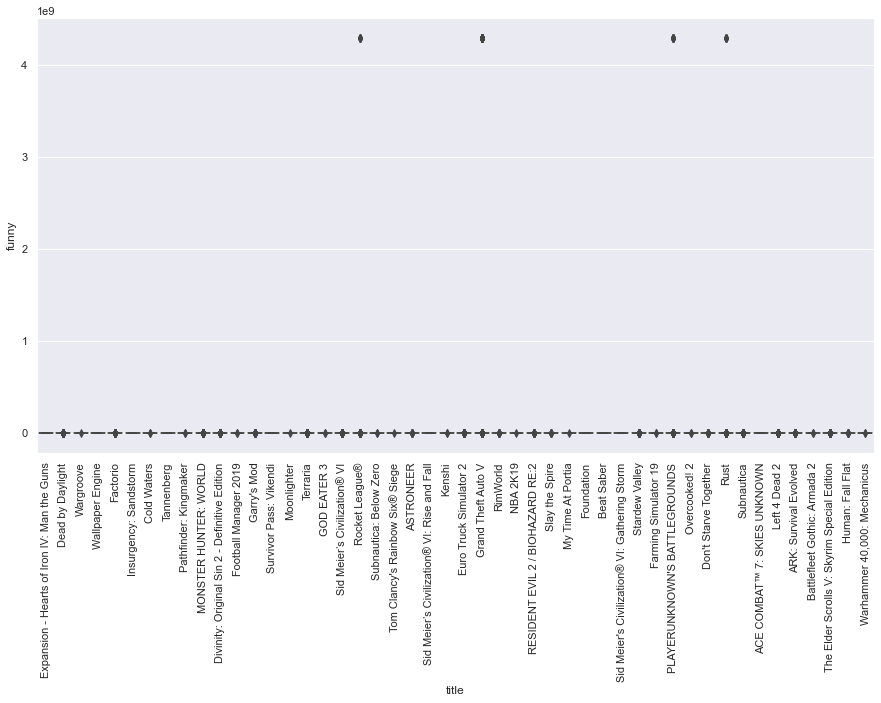

In [9]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(y='funny', x='title',data=fun_vote)
plt.xticks(rotation=90)

In [10]:
fun_vote = fun_vote[fun_vote.funny < 10000]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'Expansion - Hearts of Iron IV: Man the Guns'),
  Text(1, 0, 'Dead by Daylight'),
  Text(2, 0, 'Wargroove'),
  Text(3, 0, 'Wallpaper Engine'),
  Text(4, 0, 'Factorio'),
  Text(5, 0, 'Insurgency: Sandstorm'),
  Text(6, 0, 'Cold Waters'),
  Text(7, 0, 'Tannenberg'),
  Text(8, 0, 'Pathfinder: Kingmaker'),
  Text(9, 0, 'MONSTER HUNTER: WORLD'),
  Text(10, 0, 'Divinity: Original Sin 2 - Definitive Edition'),
  Text(11, 0, 'Football Manager 2019'),
  Text(12, 0, "Garry's Mod"),
  Text(13, 0, 'Survivor Pass: Vikendi'),
  Text(14, 0, 'Moonlighter'),
  Text(15, 0, 'Terraria'),
  Text(16, 0, 'GOD EATER 3'),
  Text(17, 0, 'Sid Meier’s Civilization® VI'),
  Text(18, 0, 'Rocket League®'),
  Text(19, 0, 'Subnautica: Below Zero'),
  Text(20, 0, "Tom Clancy's Rainbow Six® Si

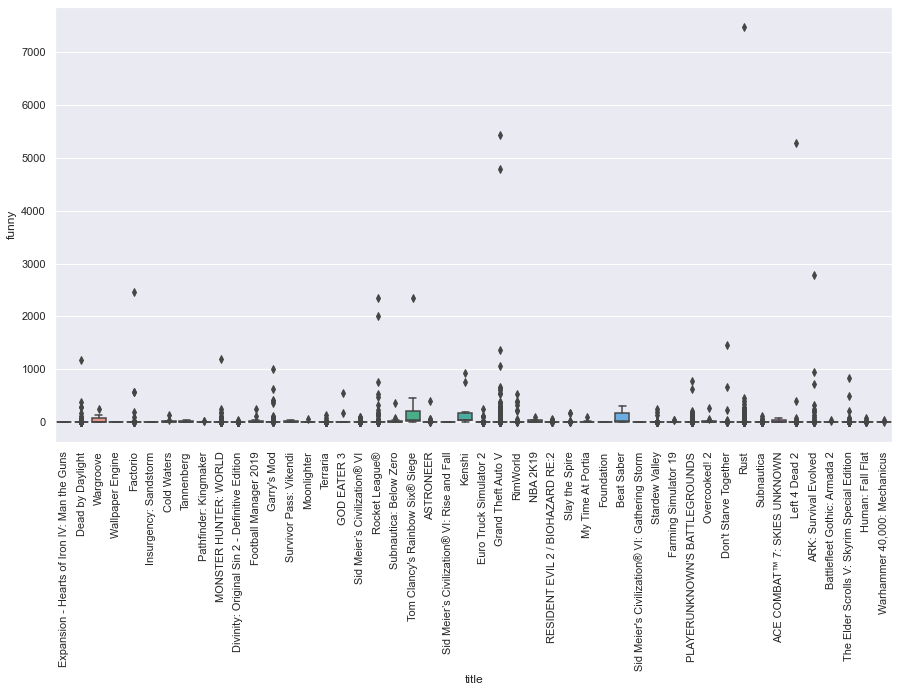

In [11]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(y='funny', x='title',data=fun_vote)
plt.xticks(rotation=90)

In [12]:
help_vote = data[['helpful', 'title']]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'Expansion - Hearts of Iron IV: Man the Guns'),
  Text(1, 0, 'Dead by Daylight'),
  Text(2, 0, 'Wargroove'),
  Text(3, 0, 'Wallpaper Engine'),
  Text(4, 0, 'Factorio'),
  Text(5, 0, 'Insurgency: Sandstorm'),
  Text(6, 0, 'Cold Waters'),
  Text(7, 0, 'Tannenberg'),
  Text(8, 0, 'Pathfinder: Kingmaker'),
  Text(9, 0, 'MONSTER HUNTER: WORLD'),
  Text(10, 0, 'Divinity: Original Sin 2 - Definitive Edition'),
  Text(11, 0, 'Football Manager 2019'),
  Text(12, 0, "Garry's Mod"),
  Text(13, 0, 'Survivor Pass: Vikendi'),
  Text(14, 0, 'Moonlighter'),
  Text(15, 0, 'Terraria'),
  Text(16, 0, 'GOD EATER 3'),
  Text(17, 0, 'Sid Meier’s Civilization® VI'),
  Text(18, 0, 'Rocket League®'),
  Text(19, 0, 'Subnautica: Below Zero'),
  Text(20, 0, "Tom Clancy's Rainbow Six® Si

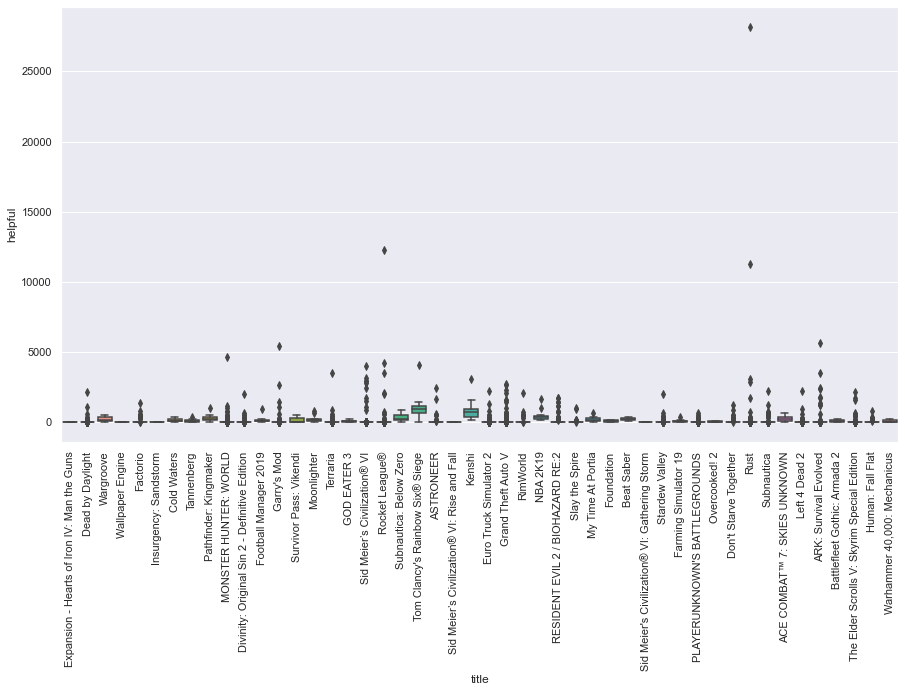

In [13]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(y='helpful', x='title',data=help_vote)
plt.xticks(rotation=90)

In [14]:
data = data[data.funny < 10000]

In [15]:
data['review'] = data['review'].fillna(0)

<ipython-input-15-e7ca82d10a43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review'] = data['review'].fillna(0)


In [16]:
data['review'].isnull().values.sum()

0

In [17]:
data['review_length'] = data['review'].str.len()
data['review_length'] = data['review_length'].fillna(0)

<ipython-input-17-f008d5da33df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_length'] = data['review'].str.len()
<ipython-input-17-f008d5da33df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_length'] = data['review_length'].fillna(0)


In [18]:
data['review_length'].isnull().values.sum()

0

In [19]:
data = data.drop('review', axis = 1)

In [20]:
true_vals = data[data.recommendation == True]
false_vals = data[data.recommendation == False]

In [21]:
print(true_vals.review_length.std())
print(true_vals.review_length.median())
print(true_vals.review_length.mode())
print(true_vals.review_length.mean())

427.4317175664863
58.0
0    9.0
dtype: float64
183.93827847817707


In [22]:
print(false_vals.review_length.std())
print(false_vals.review_length.median())
print(false_vals.review_length.mode())
print(false_vals.review_length.mean())

556.0747007443193
116.0
0    8.0
dtype: float64
294.7006398537477


In [23]:
data = data[data.review_length != 0]

In [24]:
data

date_posted  funny  helpful  hour_played  is_early_access_review  \
0            2974.0      2        4          578                   False   
1            2974.0      0        0          184                   False   
2            2971.0      0        0          892                   False   
3            2733.0    126     1086          676                   False   
4            2374.0     85     2139          612                   False   
...             ...    ...      ...          ...                     ...   
434886       2889.0      1       37           10                   False   
434887       2889.0      3       41           38                   False   
434888       2892.0      0        0           36                   False   
434889       2890.0      1       44           12                   False   
434890       2954.0      1       28           20                   False   

        recommendation                                        title  \
0                 True  Expansion - Hearts of Iron IV: Man the Guns   
1                 True  Expansion - Hearts of Iron IV: Man the Guns   
2                 True  Expansion - Hearts of Iron IV: Man the Guns   
3                 True                             Dead by Daylight   
4                 True                             Dead by Daylight   
...                ...                                          ...   
434886            True                 Warhammer 40,000: Mechanicus   
434887            True                 Warhammer 40,000: Mechanicus   
434888            True                 Warhammer 40,000: Mechanicus   
434889            True                 Warhammer 40,000: Mechanicus   
434890            True                 Warhammer 40,000: Mechanicus   

        review_length  
0               195.0  
1                 4.0  
2               171.0  
3              2094.0  
4              1397.0  
...               ...  
434886         1977.0  
434887         2535.0  
434888          730.0  
434889         1789.0  
434890         1054.0  

[433322 rows x 8 columns]

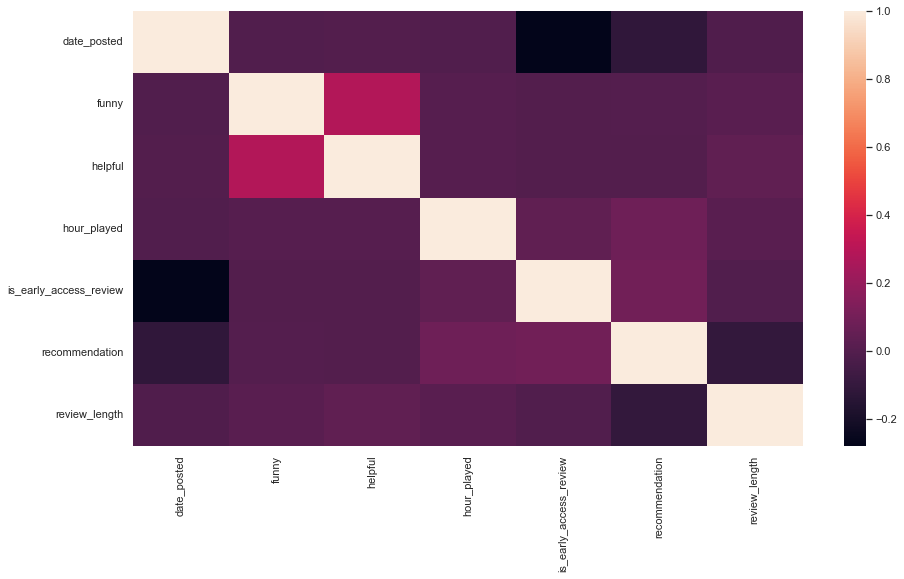

In [25]:
dataplot=sns.heatmap(data.corr())

In [26]:
data = data.drop('date_posted', axis = 1)

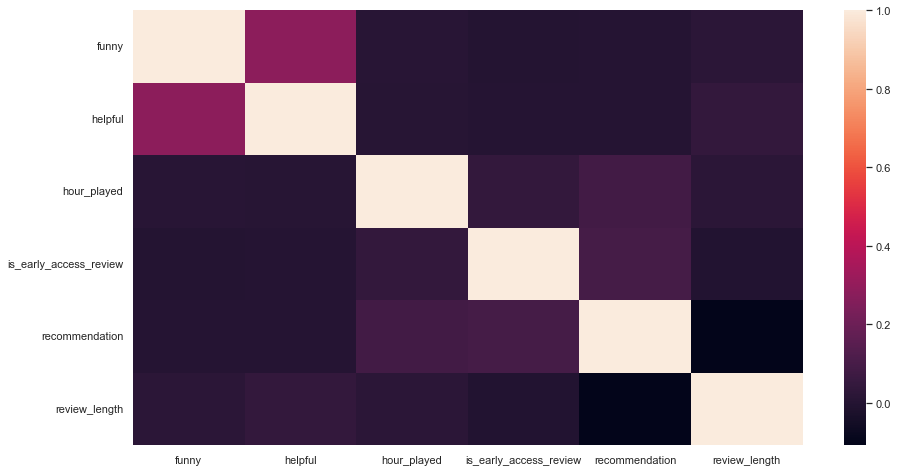

In [27]:
dataplot=sns.heatmap(data.corr())

In [28]:
titles = {}
pos = 0
for title in data.title:
    if title not in titles:
        titles[title] = pos
        pos += 1

In [29]:
data['title'] = data.title.replace(titles)

In [30]:
data = data.reset_index(drop=True)
data

funny  helpful  hour_played  is_early_access_review  recommendation  \
0           2        4          578                   False            True   
1           0        0          184                   False            True   
2           0        0          892                   False            True   
3         126     1086          676                   False            True   
4          85     2139          612                   False            True   
...       ...      ...          ...                     ...             ...   
433317      1       37           10                   False            True   
433318      3       41           38                   False            True   
433319      0        0           36                   False            True   
433320      1       44           12                   False            True   
433321      1       28           20                   False            True   

        title  review_length  
0           0          195.0  
1           0            4.0  
2           0          171.0  
3           1         2094.0  
4           1         1397.0  
...       ...            ...  
433317     47         1977.0  
433318     47         2535.0  
433319     47          730.0  
433320     47         1789.0  
433321     47         1054.0  

[433322 rows x 7 columns]

In [31]:
uniqueGames = data.title.unique()

In [32]:
dataFrameDict = {elem : pd.DataFrame for elem in uniqueGames}

In [33]:
for key in dataFrameDict.keys():
    dataFrameDict[key] = data[:][data.title == key]

In [34]:
def standard_scale(xTrain, xTest):
    scaler = StandardScaler()

    xTrain = scaler.fit_transform(xTrain)
    xTest = scaler.transform(xTest)

    return xTrain, xTest

In [35]:
print(titles)

{'Expansion - Hearts of Iron IV: Man the Guns': 0, 'Dead by Daylight': 1, 'Wargroove': 2, 'Wallpaper Engine': 3, 'Factorio': 4, 'Insurgency: Sandstorm': 5, 'Cold Waters': 6, 'Tannenberg': 7, 'Pathfinder: Kingmaker': 8, 'MONSTER HUNTER: WORLD': 9, 'Divinity: Original Sin 2 - Definitive Edition': 10, 'Football Manager 2019': 11, "Garry's Mod": 12, 'Survivor Pass: Vikendi': 13, 'Moonlighter': 14, 'Terraria': 15, 'GOD EATER 3': 16, 'Sid Meier’s Civilization® VI': 17, 'Rocket League®': 18, 'Subnautica: Below Zero': 19, "Tom Clancy's Rainbow Six® Siege": 20, 'ASTRONEER': 21, 'Sid Meier’s Civilization® VI: Rise and Fall': 22, 'Kenshi': 23, 'Euro Truck Simulator 2': 24, 'Grand Theft Auto V': 25, 'RimWorld': 26, 'NBA 2K19': 27, 'RESIDENT EVIL 2 / BIOHAZARD RE:2': 28, 'Slay the Spire': 29, 'My Time At Portia': 30, 'Foundation': 31, 'Beat Saber': 32, "Sid Meier's Civilization® VI: Gathering Storm": 33, 'Stardew Valley': 34, 'Farming Simulator 19': 35, "PLAYERUNKNOWN'S BATTLEGROUNDS": 36, 'Overcoo

In [37]:
acc_list = []
f1_list = []
for key in dataFrameDict:
    if len(dataFrameDict[key]) > 100:
        game = pd.DataFrame(dataFrameDict[key].copy())
        y = game.pop('recommendation').astype(int)
        if len(y.unique()) == 1:
            continue
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(game, y, test_size=0.25)
            X_train_split, X_test_split = standard_scale(X_train_split, X_test_split)
            if len(y_train_split.unique()) == 1 or len(y_test_split.unique()) == 1:
                continue
            else:
                clf = LogisticRegression().fit(X_train_split, y_train_split)

                y_pred_split = clf.predict(X_test_split)
                count = collections.Counter(y_pred_split)
                total = 0
                for num in count:
                    total += count[num]
                    
                percent = (count[1] / total) * 100
                print("Game " + str(key) + " is recommended " + str(percent) + "%")

                y_true_split = y_test_split

                accuracy = accuracy_score(y_true_split, y_pred_split)
                f1 = f1_score(y_true_split, y_pred_split)
                
                acc_list.append(accuracy)
                f1_list.append(f1)
print(np.mean(acc_list))
print(np.mean(f1_list))

Game 1 is recommended 98.59332732191163%
Game 5 is recommended 100.0%
Game 9 is recommended 99.19530230535015%
Game 10 is recommended 91.66666666666666%
Game 12 is recommended 96.07843137254902%
Game 17 is recommended 91.6030534351145%
Game 18 is recommended 99.85242030696575%
Game 21 is recommended 99.84962406015038%
Game 25 is recommended 95.00642260757868%
Game 28 is recommended 100.0%
Game 29 is recommended 100.0%
Game 36 is recommended 63.76591455163081%
Game 39 is recommended 99.1706629055007%
Game 43 is recommended 2.0408163265306123%
Game 45 is recommended 97.82608695652173%
Game 46 is recommended 97.67441860465115%
0.8288273891332136
0.837210801895563


In [36]:
acc_list = []
f1_list = []
for key in dataFrameDict:
    if len(dataFrameDict[key]) > 100:
        game = pd.DataFrame(dataFrameDict[key].copy())
        y = game.pop('recommendation').astype(int)
        if len(y.unique()) == 1:
            continue
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(game, y, test_size=0.25)
            if len(y_train_split.unique()) == 1 or len(y_test_split.unique()) == 1:
                continue
            else:
                clf = tree.DecisionTreeClassifier().fit(X_train_split, y_train_split)

                y_pred_split = clf.predict(X_test_split)
                count = collections.Counter(y_pred_split)
                total = 0
                for num in count:
                    total += count[num]
                    
                percent = (count[1] / total) * 100
                print("Game " + str(key) + " is recommended " + str(percent) + "%")

                y_true_split = y_test_split

                accuracy = accuracy_score(y_true_split, y_pred_split)
                f1 = f1_score(y_true_split, y_pred_split)
                
                acc_list.append(accuracy)
                f1_list.append(f1)
print(np.mean(acc_list))
print(np.mean(f1_list))

Game 1 is recommended 74.06672678088367%
Game 5 is recommended 96.36363636363636%
Game 9 is recommended 76.59852109612875%
Game 10 is recommended 93.75%
Game 12 is recommended 98.0392156862745%
Game 17 is recommended 66.41221374045801%
Game 18 is recommended 90.68476977567886%
Game 21 is recommended 96.69172932330827%
Game 25 is recommended 55.86464354527938%
Game 29 is recommended 98.46153846153847%
Game 36 is recommended 57.78397635946864%
Game 39 is recommended 76.46262341325811%
Game 43 is recommended 14.285714285714285%
Game 45 is recommended 64.67391304347827%
Game 46 is recommended 95.34883720930233%
0.7740527622142956
0.799554440083789


In [38]:
acc_list = []
f1_list = []
for key in dataFrameDict:
    if len(dataFrameDict[key]) > 100:
        game = pd.DataFrame(dataFrameDict[key].copy())
        y = game.pop('recommendation').astype(int)
        if len(y.unique()) == 1:
            continue
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(game, y, test_size=0.25)
            if len(y_train_split.unique()) == 1 or len(y_test_split.unique()) == 1:
                continue
            else:
                clf = GaussianNB().fit(X_train_split, y_train_split)

                y_pred_split = clf.predict(X_test_split)
                count = collections.Counter(y_pred_split)
                total = 0
                for num in count:
                    total += count[num]
                    
                percent = (count[1] / total) * 100
                print("Game " + str(key) + " is recommended " + str(percent) + "%")

                y_true_split = y_test_split

                accuracy = accuracy_score(y_true_split, y_pred_split)
                f1 = f1_score(y_true_split, y_pred_split)
                
                acc_list.append(accuracy)
                f1_list.append(f1)
print(np.mean(acc_list))
print(np.mean(f1_list))

Game 1 is recommended 1.0640216411181245%
Game 5 is recommended 100.0%
Game 9 is recommended 96.86820356676816%
Game 10 is recommended 31.25%
Game 12 is recommended 98.0392156862745%
Game 17 is recommended 96.18320610687023%
Game 18 is recommended 1.2987012987012987%
Game 21 is recommended 92.33082706766918%
Game 25 is recommended 3.5725754656390496%
Game 29 is recommended 100.0%
Game 36 is recommended 3.1842911983208593%
Game 39 is recommended 6.471086036671368%
Game 43 is recommended 10.204081632653061%
Game 45 is recommended 5.706521739130435%
Game 46 is recommended 6.976744186046512%
0.5540992112139879
0.4676203205919988


In [ ]:
y = data.pop('recommendation').astype(int)

In [ ]:
y

In [ ]:
logo = LeaveOneGroupOut()

In [ ]:
acc = []
f1 = []

for train_index, test_index in logo.split(data, y, data.title):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_true = y_test
    
    acc.append(accuracy_score(y_true, y_pred))
    f1.append(f1_score(y_true, y_pred))
    
print(np.mean(acc))
print(np.mean(f1))

In [ ]:
acc = []
f1 = []

for train_index, test_index in logo.split(data, y, data.title):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    X_train, X_test = standard_scale(X_train, X_test)
    y_train, y_test = y[train_index], y[test_index]
    
    clf = LogisticRegression().fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_true = y_test
    
    acc.append(accuracy_score(y_true, y_pred))
    f1.append(f1_score(y_true, y_pred))
    
print(np.mean(acc))
print(np.mean(f1))

In [ ]:
acc = []
f1 = []

for train_index, test_index in logo.split(data, y, data.title):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = GaussianNB().fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_true = y_test
    
    acc.append(accuracy_score(y_true, y_pred))
    f1.append(f1_score(y_true, y_pred))
    
print(np.mean(acc))
print(np.mean(f1))

In [ ]:
def logRegSplit(data, y):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(data, y, test_size=0.25)
    X_train_split, X_test_split = standard_scale(X_train_split, X_test_split)
    clf = LogisticRegression().fit(X_train_split, y_train_split)
    
    y_pred_split = clf.predict(X_test_split)
    
    y_true_split = y_test_split
    
    accuracy = accuracy_score(y_true_split, y_pred_split)
    f1 = f1_score(y_true_split, y_pred_split)
    
    return accuracy, f1

In [ ]:
def decisionTreeSplit(data, y):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(data, y, test_size=0.25)
    clf = tree.DecisionTreeClassifier().fit(X_train_split, y_train_split)
    
    y_pred_split = clf.predict(X_test_split)
    
    y_true_split = y_test_split
    
    accuracy = accuracy_score(y_true_split, y_pred_split)
    f1 = f1_score(y_true_split, y_pred_split)
    
    return accuracy, f1

In [ ]:
def gaussianNBSplit(data, y):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(data, y, test_size=0.25)
    clf = GaussianNB().fit(X_train_split, y_train_split)
    
    y_pred_split = clf.predict(X_test_split)
    
    y_true_split = y_test_split
    
    accuracy = accuracy_score(y_true_split, y_pred_split)
    f1 = f1_score(y_true_split, y_pred_split)
    
    return accuracy, f1

In [ ]:
accuracy = []
f1 = []
for i in range(0,10):
    toAppend = decisionTreeSplit(data, y)
    accuracy.append(toAppend[0])
    f1.append(toAppend[1])
print(np.mean(accuracy))
print(np.mean(f1))

In [ ]:
accuracy = []
f1 = []
for i in range(0,10):
    toAppend = logRegSplit(data, y)
    accuracy.append(toAppend[0])
    f1.append(toAppend[1])
print(np.mean(accuracy))
print(np.mean(f1))

In [ ]:
accuracy = []
f1 = []
for i in range(0,10):
    toAppend = gaussianNBSplit(data, y)
    accuracy.append(toAppend[0])
    f1.append(toAppend[1])
print(np.mean(accuracy))
print(np.mean(f1))